In [28]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

## Training and Test Split

In [2]:
df = pd.read_csv('project_df.csv', index_col=0)

In [3]:
df

,CWE_CLASS,CLEAN_DESCRIPTION
3,1,prompt parsing bash allows local user execute ...
4,1,perl sh csh shell interpreters installed cgi b...
5,1,internet explorer allows remote attackers modi...
7,1,download behavior internet explorer allows rem...
12,1,windows nt autorun executes file non removable...
...,...,...
56683,0,adobe audition versions earlier affected bound...
56684,0,adobe audition versions earlier affected bound...
56685,0,adobe audition versions earlier affected bound...
56691,0,bounds read vulnerability exists reading tga f...


In [4]:
des = df.CLEAN_DESCRIPTION.values
labels = df.CWE_CLASS.values
print(des.shape)
print(labels.shape)


(6585,)
(6585,)


In [5]:
print(des)

['prompt parsing bash allows local user execute commands user creating directory command execute'
 'perl sh csh shell interpreters installed cgi bin directory www site allows remote attackers execute arbitrary commands'
 'internet explorer allows remote attackers modify execute files import export favorites feature aka importexportfavorites vulnerability'
 ...
 'adobe audition versions earlier affected bounds read vulnerability lead disclosure sensitive memory attacker leverage vulnerability bypass mitigations aslr exploitation issue requires user interaction victim open malicious file'
 'bounds read vulnerability exists reading tga file open design alliance drawings sdk specific issue exists loading tga files unchecked input data crafted tga file leads bounds read attacker leverage vulnerability execute code context current process'
 'bounds read vulnerability exists reading tif file open design alliance drawings sdk specific issue exists loading tif files unchecked input data crafted

In [6]:
print(labels)

[1 1 1 ... 0 0 0]


In [7]:
train_des, test_des, train_label, test_label = train_test_split(des,labels)
print(train_des.shape)
print(test_des.shape)
print(train_label.shape)
print(test_label.shape)

(4938,)
(1647,)
(4938,)
(1647,)


In [8]:
import tqdm as notebook_tqdm
from transformers import BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

C:\Users\genem\anaconda3\envs\tf-2.13\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
print(des[0])

prompt parsing bash allows local user execute commands user creating directory command execute


I will now use the pretrained Bert model to tokenize the words from the description text in des[0]

In [10]:
print('Tokens to ids', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(des[0])))

Tokens to ids [25732, 11968, 7741, 24234, 4473, 2334, 5310, 15389, 10954, 5310, 4526, 14176, 3094, 15389]


The next step in this example[1] is roughly a six step process which I will briefly summarize. Inorder to use the transformer we must first tokenize each sentence as shown above, and then create start, end, and padding to ensure uniformed array input. The referenced article provides great details.

### Find Padding Value
The function below is usued to find the max sive of our text input to determine appropriate padding. The function was adapted from the reference article[1].

In [11]:
len(des)

6585

In [12]:
max_len = 0
for i in range(1,len(des)):
    input_ids = len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(des[i])))
    if max_len < input_ids:
                    max_len = input_ids               
   
print(max_len)

537


It was determined that the largest input in description text for 6585 descriptions was 537. This is the size of our padding.

In [13]:
def mask_input(des,max_len):
    input_ids = []
    attention_masks = []
    i = 0
    for de in des:
        if(i<3):
            print("Description", de)
        encoded_dict = tokenizer.encode_plus(
            de,
            add_special_tokens = True,
            max_length = max_len,
            pad_to_max_length = True,
            return_attention_mask = True )
        if(i<3):
            print("dict", encoded_dict['input_ids'])
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

        i = i+1
    input_ids = tf.convert_to_tensor(input_ids)
    attention_masks = tf.convert_to_tensor(attention_masks)
    return input_ids, attention_masks

In [14]:
train_inp, train_mask = mask_input(train_des,max_len)
val_inp, val_mask = mask_input(test_des, max_len)
train_label = tf.convert_to_tensor(train_label)
val_label = tf.convert_to_tensor(test_label)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Description flaw found earlier bounds read function crafted djvu file lead application crash consequences
dict [101, 28450, 2179, 3041, 19202, 3191, 3853, 19275, 6520, 19722, 5371, 2599, 4646, 5823, 8465, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

C:\Users\genem\anaconda3\envs\tf-2.13\lib\site-packages\transformers\tokenization_utils_base.py:2622: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Description pim parser tcpdump buffer read print functions
dict [101, 14255, 2213, 11968, 8043, 22975, 17299, 24237, 17698, 3191, 6140, 4972, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:
print("Train_input_shape", train_inp.shape)
print("Train_mask_shape", train_mask.shape)
print("Validation_input_shape", val_inp.shape)
print("Validation_mask_shape", val_mask.shape)
print("Train_label_shape", train_label.shape)
print("Test_label_shape", test_label.shape)

Train_input_shape (4938, 537)
Train_mask_shape (4938, 537)
Validation_input_shape (1647, 537)
Validation_mask_shape (1647, 537)
Train_label_shape (4938,)
Test_label_shape (1647,)


In [21]:
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
log_dir = 'logs'
model_save_path = 'fp_bert_model.h5'
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                monitor='val_loss',
                                                mode='min',
                                                save_best_only=True),
             keras.callbacks.TensorBoard(log_dir=log_dir)]
print('\nBert Model', bert_model.summary())
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)
bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [51]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=2,epochs=4,validation_data=([val_inp,val_mask],val_label),callbacks=callbacks)

Epoch 1/4
2469/2469 [==============================] - 433s 175ms/step - loss: 0.0685 - accuracy: 0.9747 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 2/4
2469/2469 [==============================] - 434s 176ms/step - loss: 0.0285 - accuracy: 0.9931 - val_loss: 0.0575 - val_accuracy: 0.9860
Epoch 3/4
2469/2469 [==============================] - 433s 176ms/step - loss: 0.0255 - accuracy: 0.9931 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 4/4
2469/2469 [==============================] - 431s 175ms/step - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.0322 - val_accuracy: 0.9927


In [52]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

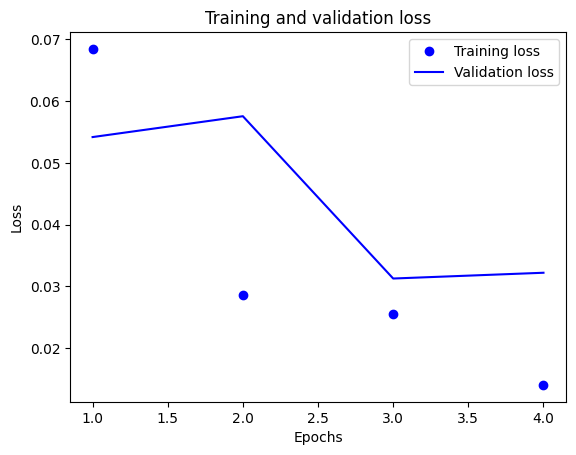

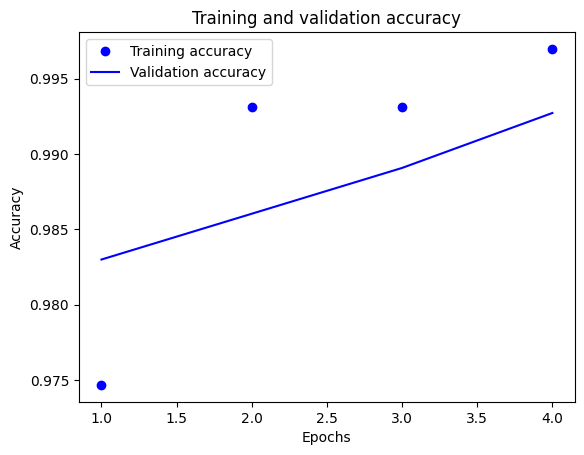

In [54]:
import matplotlib.pyplot as plt
plot_history()